In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math
from PIL import Image
import numpy as np 
import copy
from collections import deque


In [3]:
def opticalFlow(referenceFrameSec):
    cap = cv2.VideoCapture(r"E:\u\sem1\cv\aat3\outpy.avi")
    ret, first_frame = cap.read()
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255
    i=1
    while(cap.isOpened()):
        ret, frame = cap.read()
        cv2.imshow("Input Window", frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        cv2.imshow("dense optical flow", rgb)
        if (referenceFrameSec == 1):
            prev_gray = gray
        elif (referenceFrameSec != 1):
            if i%referenceFrameSec == 0:
                prev_gray = gray    
        if(i%30 ==0 ):
            plt.axis('off')
            plt.imshow(rgb,cmap='gray', vmin=0, vmax=255)
            plt.show()       
        i=i+1

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

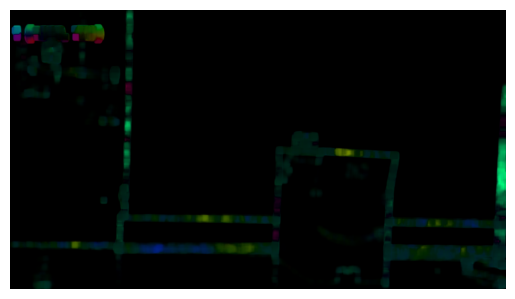

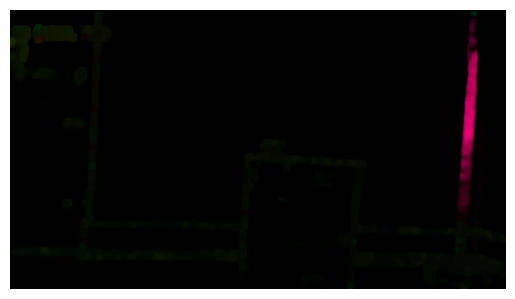

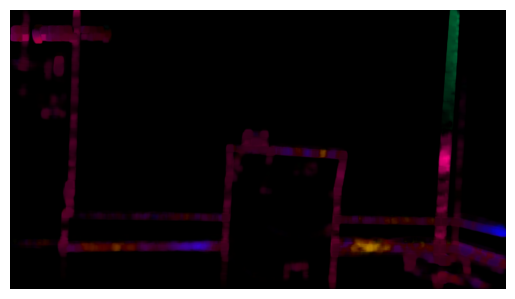

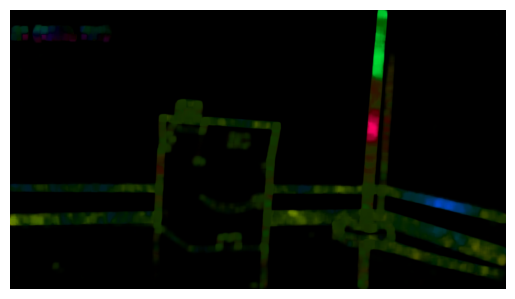

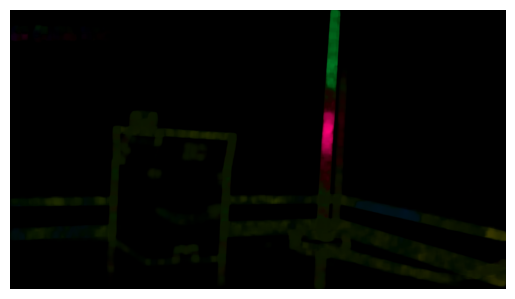

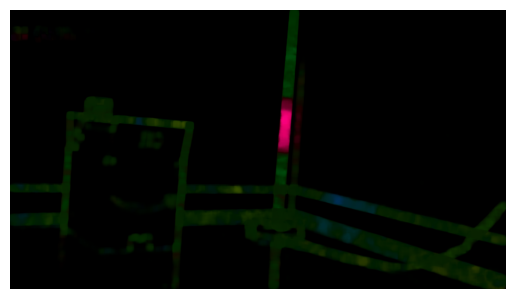

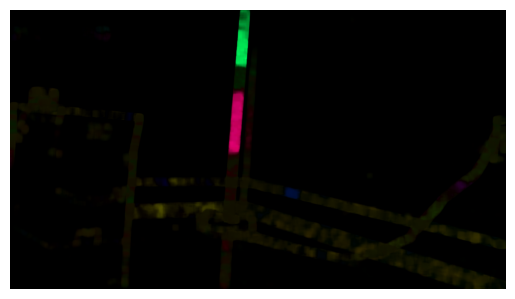

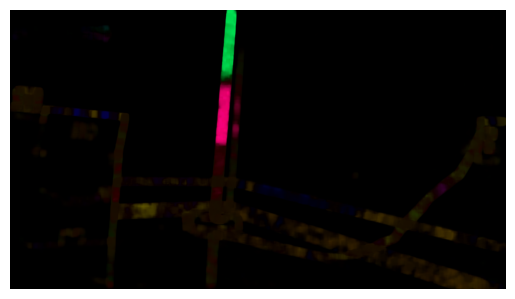

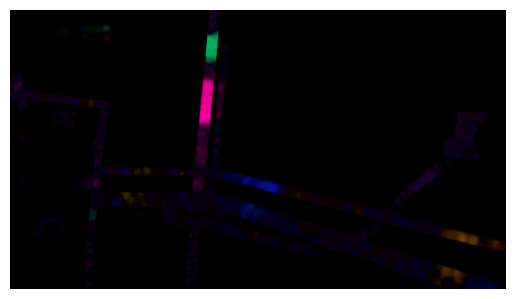

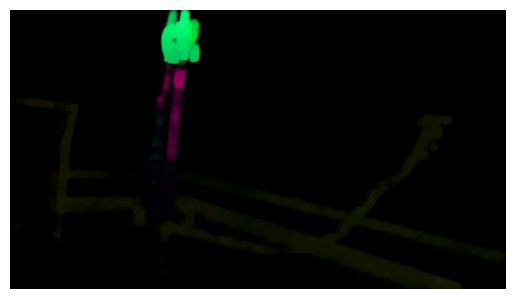

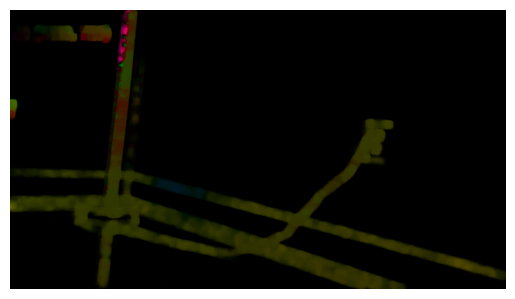

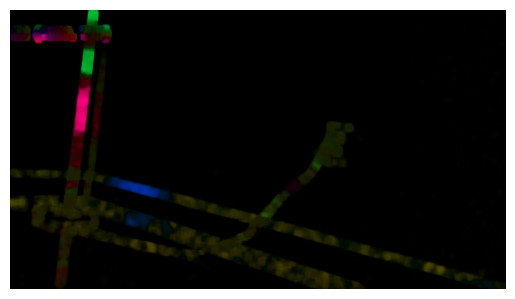

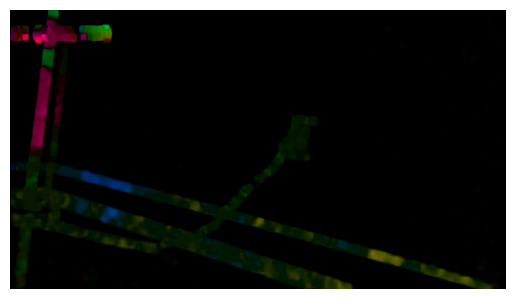

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-5rb_9df3\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [4]:
opticalFlow(1)

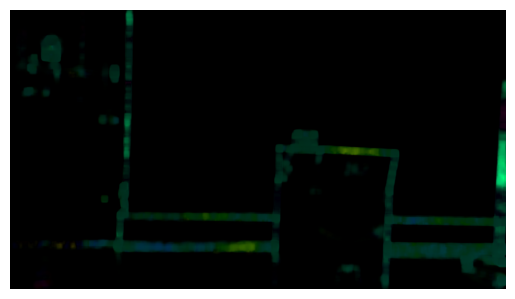

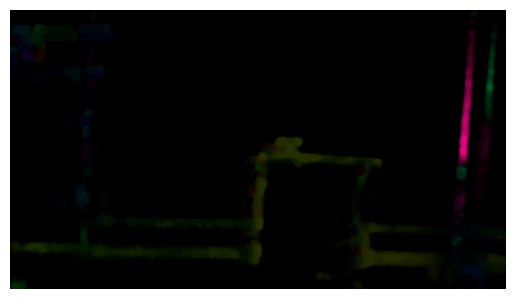

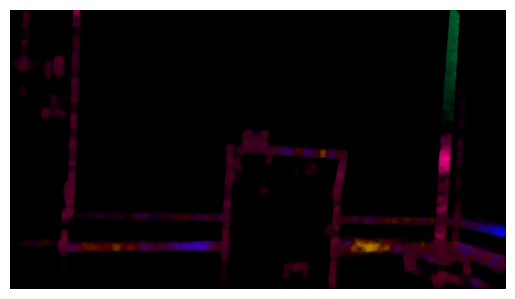

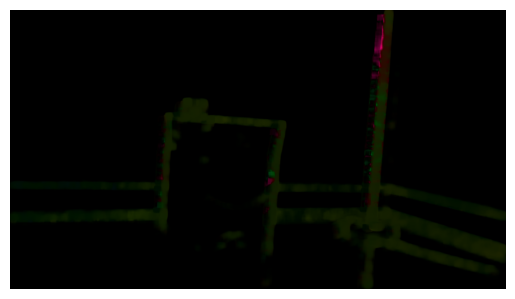

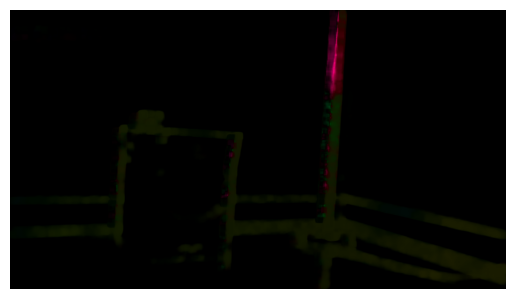

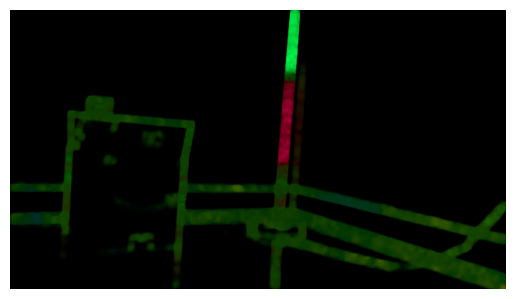

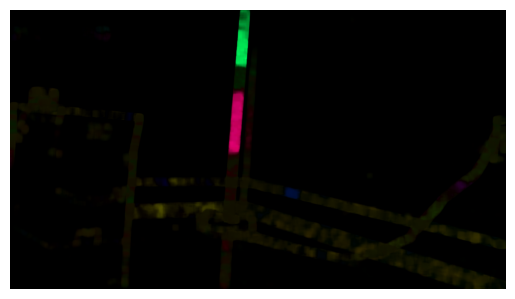

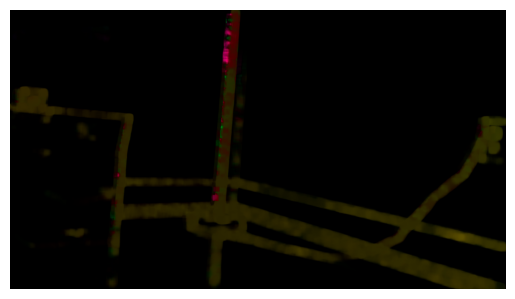

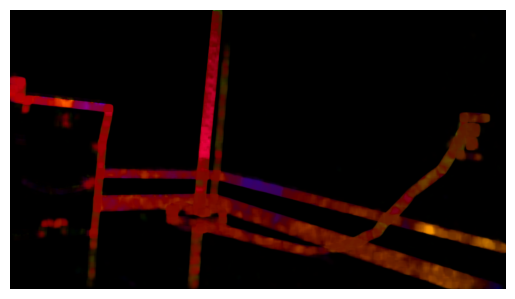

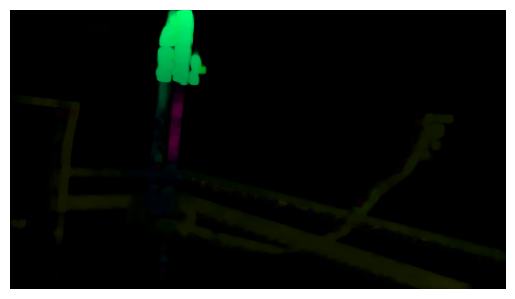

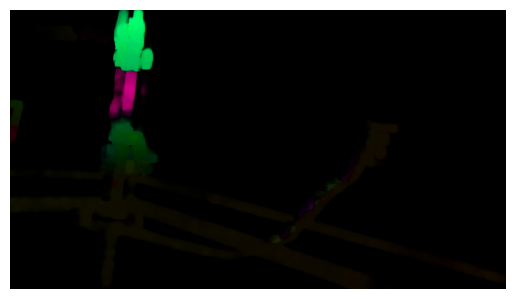

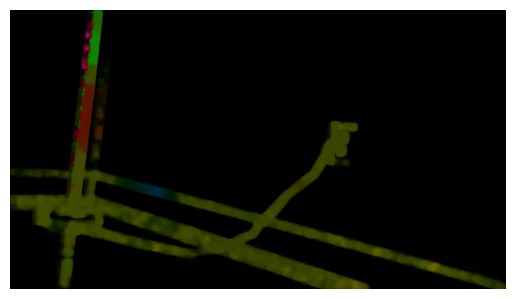

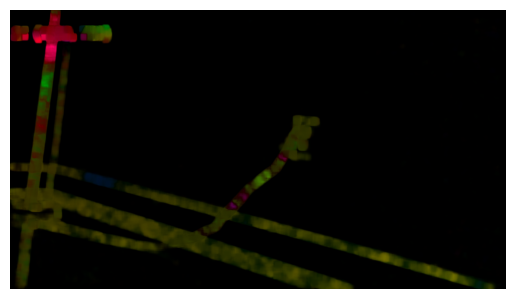

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-5rb_9df3\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [5]:
opticalFlow(11)

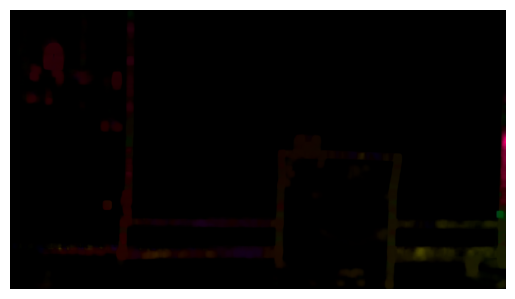

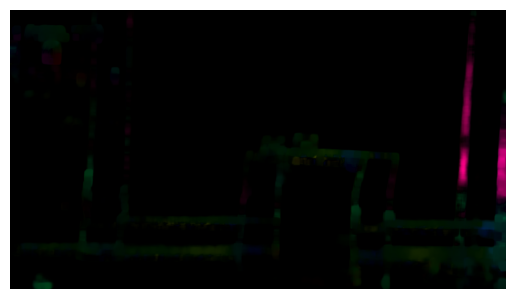

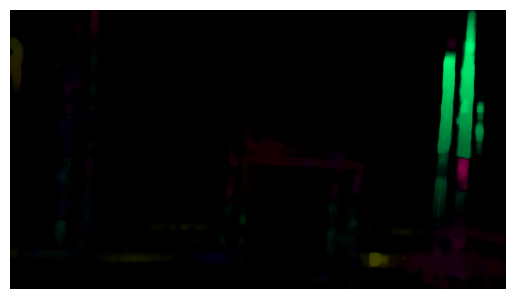

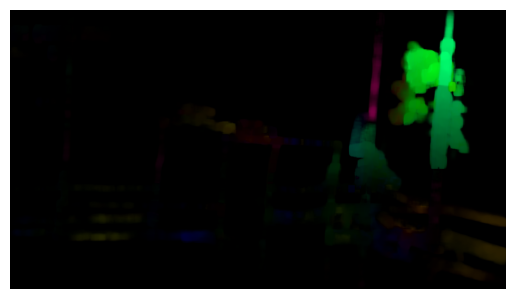

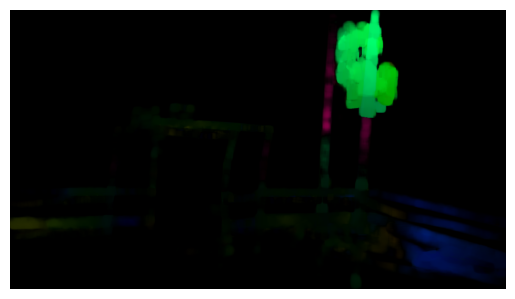

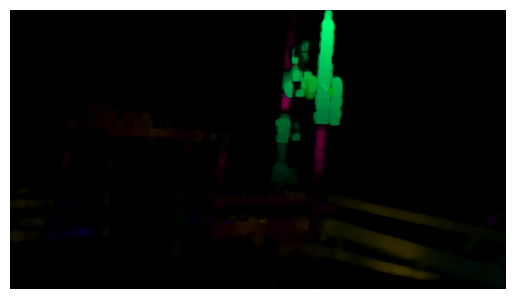

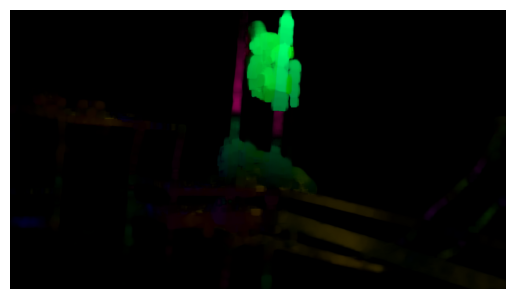

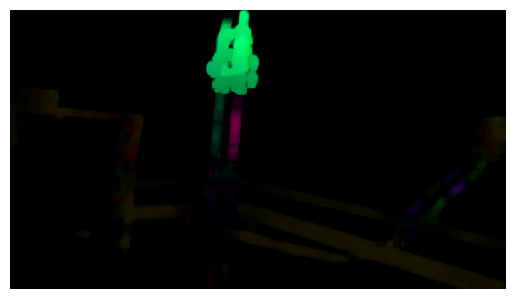

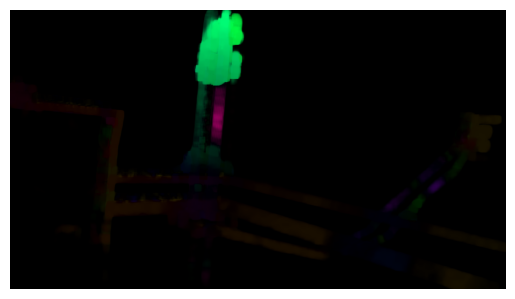

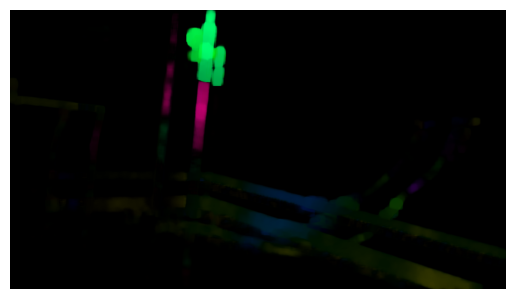

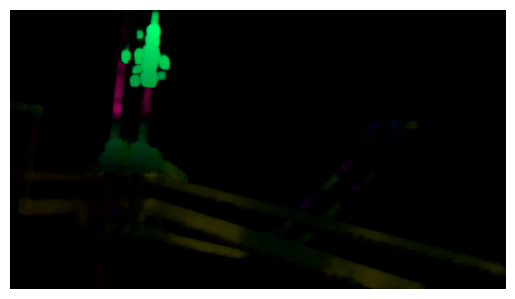

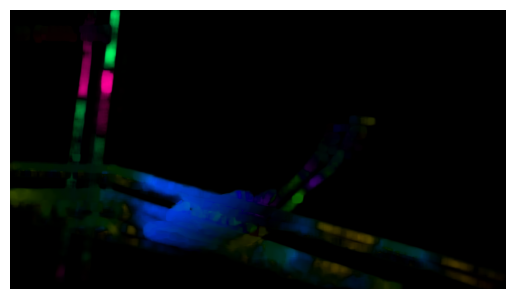

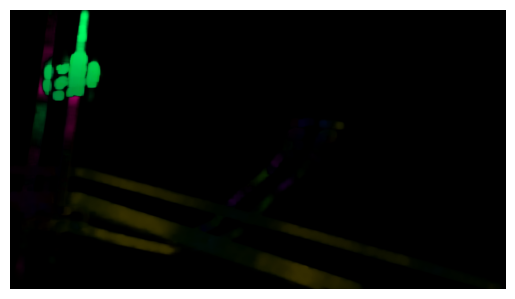

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-5rb_9df3\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [6]:
opticalFlow(31)